In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [44]:
# loading the data
comp_price = pd.read_csv("C:/Users/user/Desktop/Data Science/Predict_new.csv/computer_Data.csv")
comp_price

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,35


In [3]:
comp_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6259 non-null   int64 
 1   price       6259 non-null   int64 
 2   speed       6259 non-null   int64 
 3   hd          6259 non-null   int64 
 4   ram         6259 non-null   int64 
 5   screen      6259 non-null   int64 
 6   cd          6259 non-null   object
 7   multi       6259 non-null   object
 8   premium     6259 non-null   object
 9   ads         6259 non-null   int64 
 10  trend       6259 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


In [45]:
comp_price.describe()

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [5]:
comp_price.corr()

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend
Unnamed: 0,1.000000,-0.199924,0.388566,0.555492,0.265376,0.184699,-0.272714,0.989818
price,-0.199924,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.388566,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.555492,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.265376,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.184699,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,-0.272714,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,0.989818,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


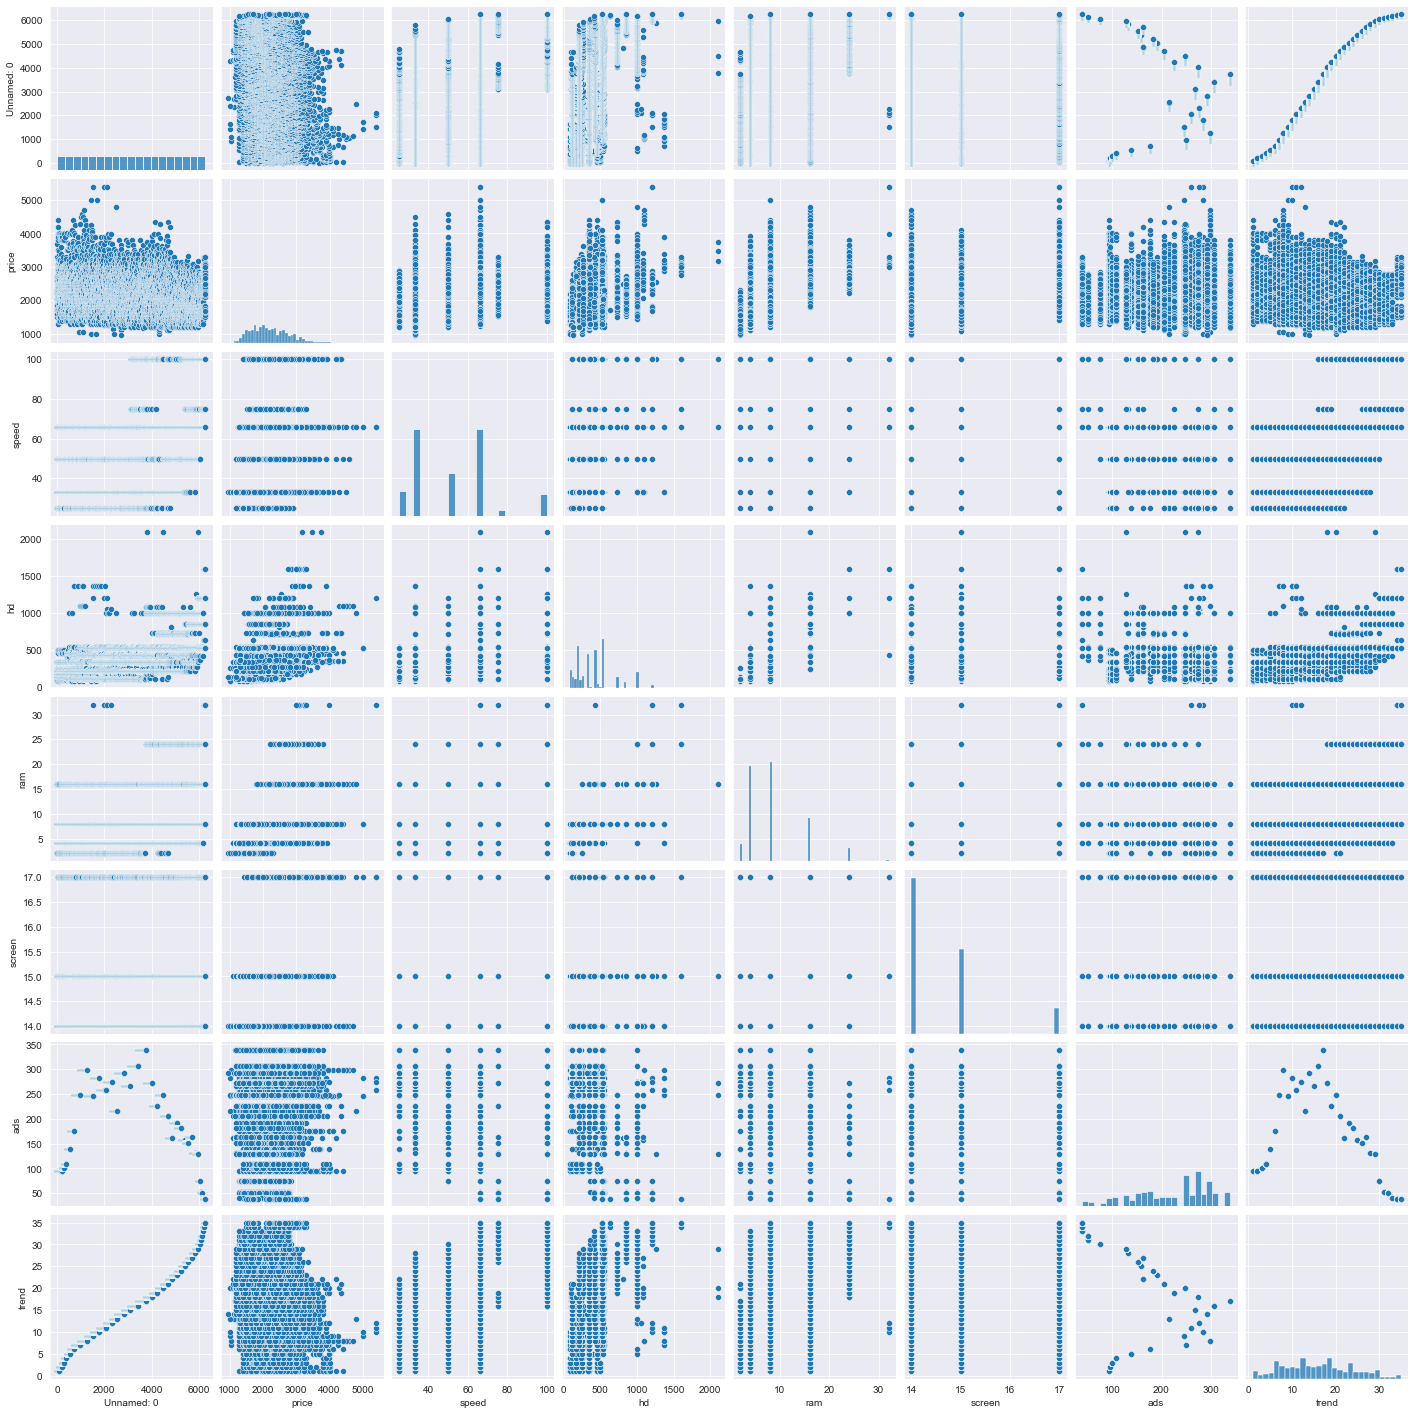

In [12]:
sns.set_style(style='darkgrid')
sns.pairplot(comp_price)

<AxesSubplot:>

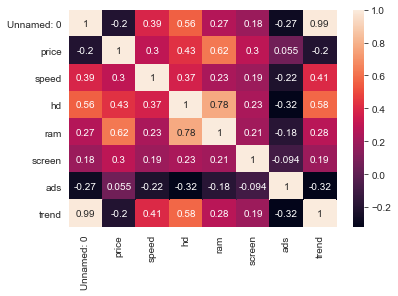

In [14]:
# Viewing the heatmap
sns.heatmap(comp_price.corr(), annot=True)

In [145]:
ml1=smf.ols("price~speed+hd+ram+cd+multi+premium+ads+trend",data=comp_price).fit()
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     2242.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:47:57   Log-Likelihood:                -44481.
No. Observations:                6259   AIC:                         8.898e+04
Df Residuals:                    6250   BIC:                         8.904e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2042.2355     23.192     88.056      0.000    1996.770    2087.701
cd[T.yes]         62.3862     10.210      6.110      0.000      42.370      82.402
multi[T.yes]      91.9589     12.239      7.514      0.000      67.967     115.951
premium[T.yes]  -520.3861     13.238    -39.310      0.000    -546.337    -494.435
speed              9.9002      0.198     50.118      0.000       9.513      10.287
hd                 0.8030      0.030     27.107      0.000       0.745       0.861
ram               50.7174      1.141     44.461      0.000      48.481      52.954
ads                0.6422      0.055     11.663      0.000       0.534       0.750
trend            -50.6567      0.673    -75.232      0.000     -51.977     -49.337
==============================================================================
Omnibus:                     1171.747   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3874.460
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                       6.366   Cond. No.                     3.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Finding tvalues and pvalues
ml1.tvalues , np.round(ml1.pvalues,5)

(Intercept          5.103075
 cd[T.yes]          6.401777
 multi[T.yes]       9.141046
 premium[T.yes]   -41.258651
 speed             50.364369
 hd                28.310833
 ram               45.264805
 screen            30.776135
 ads               12.808936
 trend            -82.470245
 dtype: float64,
 Intercept         0.0
 cd[T.yes]         0.0
 multi[T.yes]      0.0
 premium[T.yes]    0.0
 speed             0.0
 hd                0.0
 ram               0.0
 screen            0.0
 ads               0.0
 trend             0.0
 dtype: float64)

In [17]:
# calculating VIF's values of independent variables  (VIF value best around 2.5 to 10. Higher multicolinearity calls for higher VIF but not too high)
## ommiting cd,multi, premium.
rsq_speed = smf.ols('speed~hd+ram+screen+cd+multi+premium+ads+trend', data=comp_price).fit().rsquared  
vif_speed = 1/(1-rsq_speed) 
vif_speed

1.2653637174997177

In [18]:
rsq_hd = smf.ols('hd~speed+ram+screen+cd+multi+premium+ads+trend', data=comp_price).fit().rsquared  
vif_hd = 1/(1-rsq_hd) 
vif_hd

4.207394801604396

In [19]:
rsq_ram = smf.ols('ram~speed+hd+screen+cd+multi+premium+ads+trend', data=comp_price).fit().rsquared  
vif_ram = 1/(1-rsq_ram) 
vif_ram

2.9746283364519175

In [20]:
rsq_screen = smf.ols('screen~speed+hd+ram+cd+multi+premium+ads+trend', data=comp_price).fit().rsquared  
vif_screen = 1/(1-rsq_screen) 
vif_screen


1.0816435677723715

In [21]:
rsq_ads = smf.ols('ads~speed+hd+ram+screen+multi+premium+cd+trend', data=comp_price).fit().rsquared  
vif_ads = 1/(1-rsq_ads) 
vif_ads

1.2172178284996031

In [23]:
rsq_trend = smf.ols('trend~speed+hd+ram+screen+multi+premium+cd+ads', data=comp_price).fit().rsquared  
vif_trend = 1/(1-rsq_trend) 
vif_trend

2.022789919481578

In [25]:
# Storing vif values in a data frame  ##Variance inflation factor. Measure of Multi-Colinearity
comp_price = {'Variables':['speed','hd','ram','screen','ads','trend'],'VIF':[vif_speed,vif_hd,vif_ram,vif_screen,vif_ads,vif_trend]}
Vif_frame = pd.DataFrame(comp_price)  
Vif_frame

,Variables,VIF
0,speed,1.265364
1,hd,4.207395
2,ram,2.974628
3,screen,1.081644
4,ads,1.217218
5,trend,2.022790


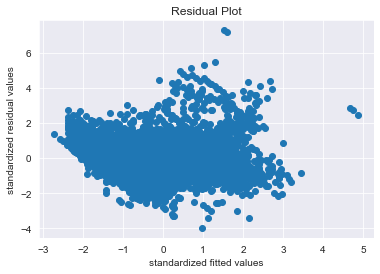

In [27]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
# User defined z = (x - mu)/sigma
def standard_values(vals) : return (vals-vals.mean())/vals.std()
plt.scatter(standard_values(ml1.fittedvalues),standard_values(ml1.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

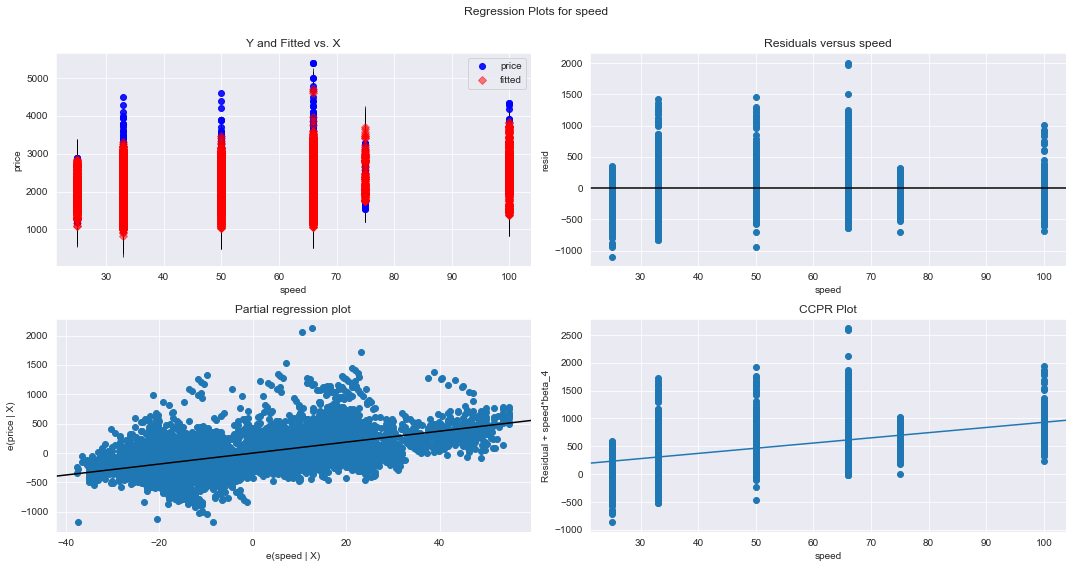

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(ml1,'speed',fig=fig)
plt.show()

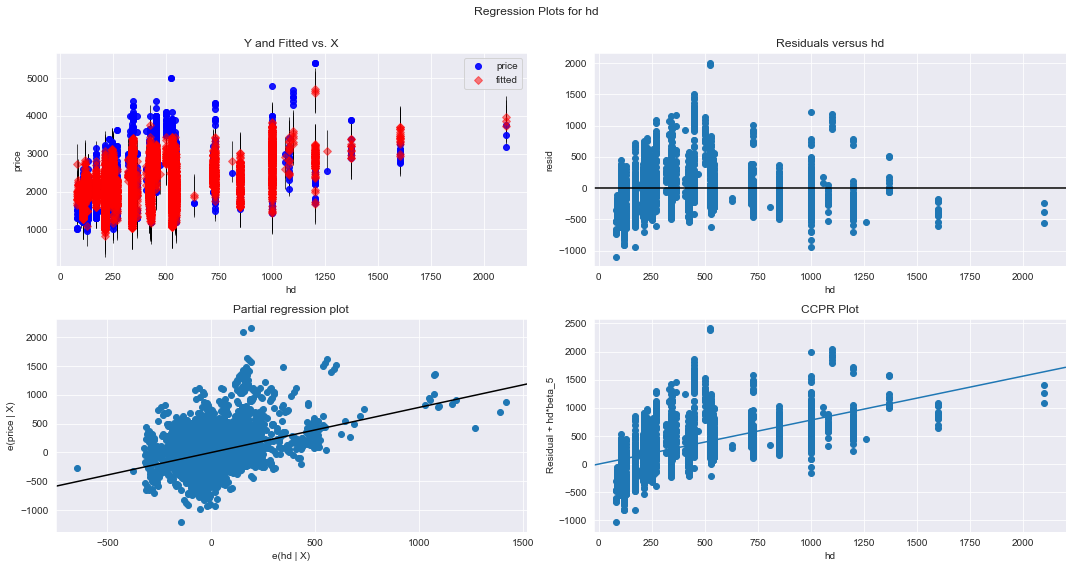

In [31]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(ml1,'hd',fig=fig)
plt.show()

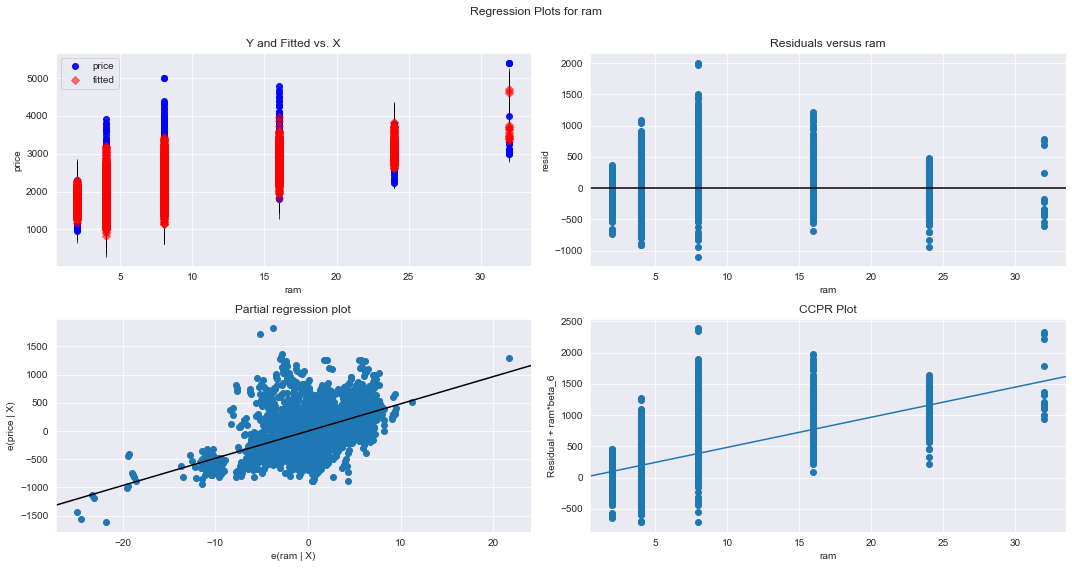

In [32]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(ml1,'ram',fig=fig)
plt.show()

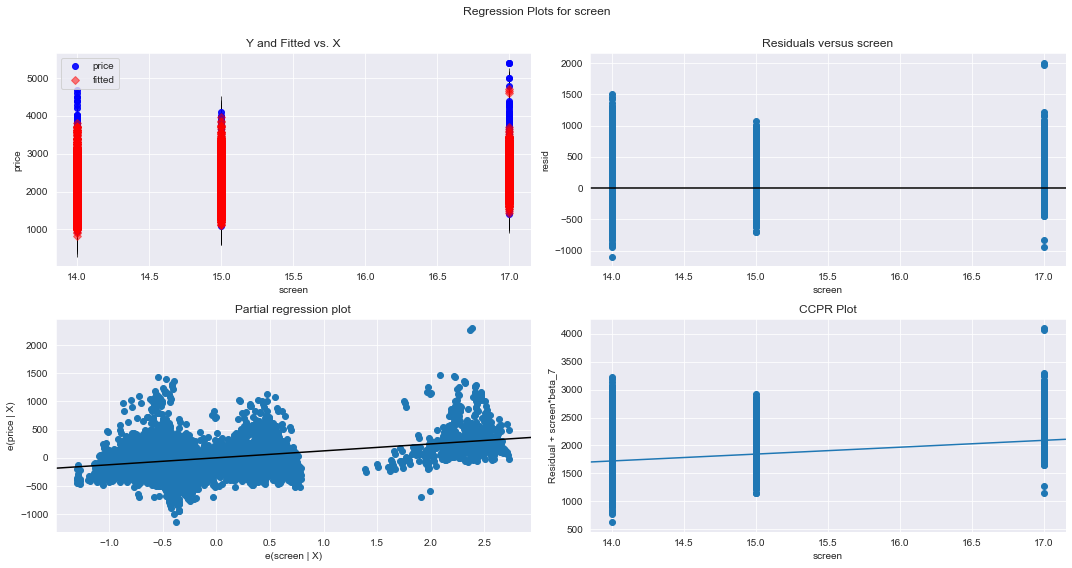

In [33]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(ml1,'screen',fig=fig)
plt.show()

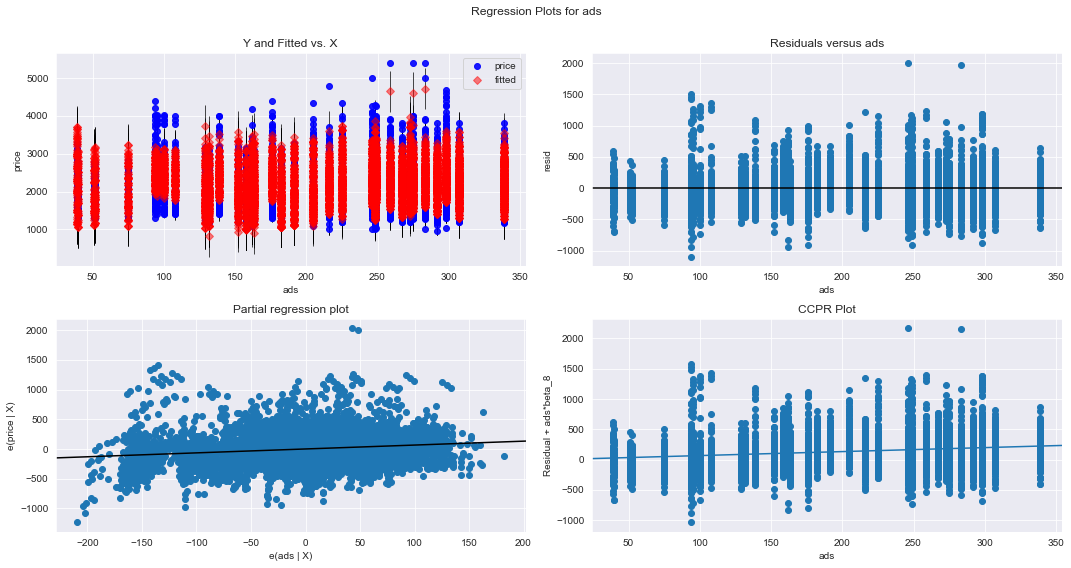

In [34]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(ml1,'ads',fig=fig)
plt.show()

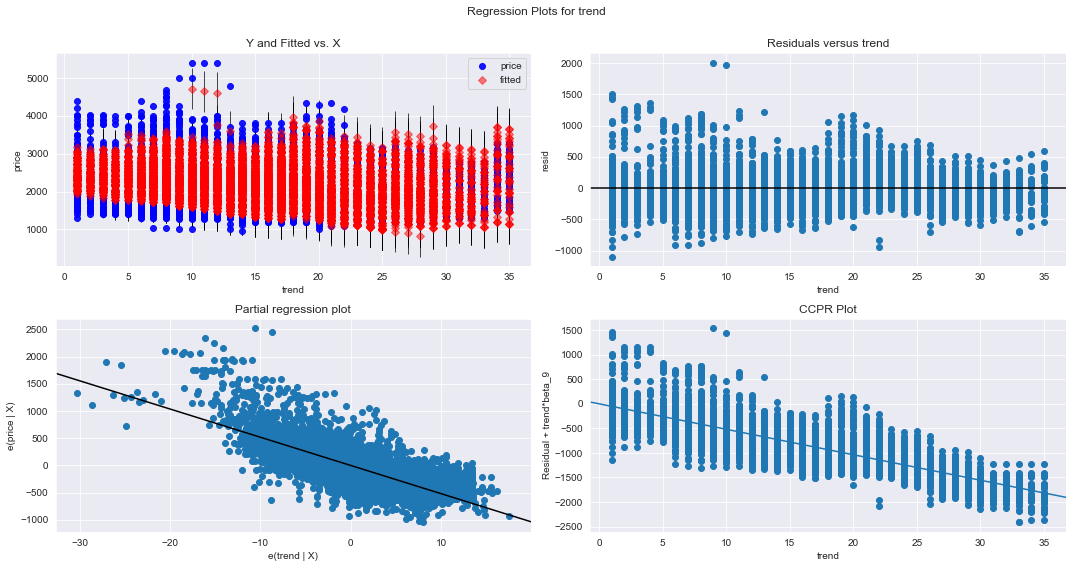

In [35]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(ml1,'trend',fig=fig)
plt.show()


In [106]:
## second model without multi,premium

ml2=smf.ols("price~speed+hd+cd+ram+ads+premium+trend",data=comp_price).fit()
ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     2531.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:13:03   Log-Likelihood:                -44509.
No. Observations:                6259   AIC:                         8.903e+04
Df Residuals:                    6251   BIC:                         8.909e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2044.6433     23.293     87.780      0.000    1998.981    2090.305
cd[T.yes]         94.1076      9.338     10.078      0.000      75.802     112.413
premium[T.yes]  -513.9545     13.269    -38.735      0.000    -539.966    -487.943
speed              9.8733      0.198     49.769      0.000       9.484      10.262
hd                 0.7824      0.030     26.410      0.000       0.724       0.840
ram               50.2386      1.144     43.916      0.000      47.996      52.481
ads                0.6290      0.055     11.380      0.000       0.521       0.737
trend            -50.2349      0.674    -74.537      0.000     -51.556     -48.914
==============================================================================
Omnibus:                     1162.651   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3748.048
Skew:                           0.940   Prob(JB):                         0.00
Kurtosis:                       6.292   Cond. No.                     3.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
## Splitting the data into train and test data 

from sklearn.model_selection import train_test_split
comp_train, comp_test  = train_test_split(comp_price, test_size = 0.3) # 30% test data

In [126]:
# preparing the model on train data 
ml2_train = smf.ols("price~speed+hd+ram+cd+ads+multi+premium+trend", data = comp_train).fit()
ml2_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     1558.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:38:03   Log-Likelihood:                -31158.
No. Observations:                4381   AIC:                         6.233e+04
Df Residuals:                    4372   BIC:                         6.239e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2017.3881     27.540     73.253      0.000    1963.396    2071.381
cd[T.yes]         59.3875     12.359      4.805      0.000      35.158      83.617
multi[T.yes]      86.5962     14.766      5.865      0.000      57.648     115.545
premium[T.yes]  -513.3792     15.673    -32.756      0.000    -544.106    -482.653
speed             10.0031      0.240     41.657      0.000       9.532      10.474
hd                 0.7834      0.035     22.403      0.000       0.715       0.852
ram               51.7171      1.361     37.988      0.000      49.048      54.386
ads                0.6532      0.066      9.940      0.000       0.524       0.782
trend            -49.9655      0.804    -62.130      0.000     -51.542     -48.389
==============================================================================
Omnibus:                      676.501   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1711.765
Skew:                           0.858   Prob(JB):                         0.00
Kurtosis:                       5.536   Cond. No.                     3.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
# train_data prediction
train_pred = ml2_train.predict(comp_train)
train_pred

3400    2822.225846
5771    1324.649105
3461    2126.023279
3621    2796.966656
5799    1656.171052
           ...     
4385    3076.554675
3933    2282.646575
1357    1848.448729
1965    2299.823693
3382    2138.277105
Length: 4381, dtype: float64

In [122]:
# train residual values 
train_resid  = train_pred - comp_train.price
train_resid

3400   -574.774154
5771   -319.350895
3461    277.023279
3621    301.966656
5799     52.171052
           ...    
4385    -38.445325
3933     92.646575
1357     58.448729
1965    510.823693
3382    373.277105
Length: 4381, dtype: float64

In [117]:
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

297.5815652244805

In [144]:
# preparing the model on test data 
ml2_test = smf.ols("price~speed+hd+ram+ads+premium+multi+screen+trend", data = comp_test).fit()
ml2_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     794.7
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:46:45   Log-Likelihood:                -13212.
No. Observations:                1878   AIC:                         2.644e+04
Df Residuals:                    1869   BIC:                         2.649e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        409.0832    113.807      3.595      0.000     185.882     632.285
premium[T.yes]  -522.3003     23.361    -22.357      0.000    -568.117    -476.483
multi[T.yes]     143.2293     18.948      7.559      0.000     106.069     180.390
speed              9.2174      0.330     27.950      0.000       8.571       9.864
hd                 0.8496      0.052     16.280      0.000       0.747       0.952
ram               47.3024      1.966     24.062      0.000      43.447      51.158
ads                0.6716      0.094      7.179      0.000       0.488       0.855
screen           118.4610      7.630     15.525      0.000     103.497     133.426
trend            -52.4047      1.140    -45.984      0.000     -54.640     -50.170
==============================================================================
Omnibus:                      400.285   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1774.209
Skew:                           0.953   Prob(JB):                         0.00
Kurtosis:                       7.364   Cond. No.                     9.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
# prediction on test data set 
test_pred = ml2_test.predict(comp_test)
test_pred

4873    1977.394942
1224    3044.254305
3096    2830.238080
1760    2283.936380
5734    3295.924187
           ...     
3564    2250.071990
3613    2448.236735
2027    2104.526445
2911    2353.867456
247     2697.744736
Length: 1878, dtype: float64


RMSE values for Test and Train Data are 300 and 297

We improved the model, Adjusted R^2=0.742 to finalmodel, Adjusted R^2=0.772. We do this by removing 'CD' that have the lowest VIF & removing the outliers

Hence, our model is predicting the price of computer with 77.2% accuracy. with train RMSE = 297 with test RMSE = 300